In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
# Set a bright color palette using the "husl" palette
sns.set_palette("husl")

In [29]:
df = pd.read_csv('E:\Apprenticeship\data\preprocessed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

features = df.iloc[:, :-1]
label = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(features, label)

In [30]:
dt = DecisionTreeClassifier(class_weight = 'balanced')

In [31]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [32]:
dt.score(X_test, y_test)

0.6175

In [33]:
y_pred = dt.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.6175

In [35]:
recall_score(y_test, y_pred, average='weighted')

0.6175

<AxesSubplot:>

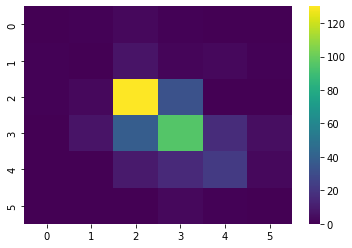

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis')

In [37]:
pred_prob = dt.predict_proba(X_test)
roc_auc_score(y_test, pred_prob, multi_class='ovr')

0.602803347625854

In [39]:
pd.DataFrame(dt.feature_importances_ * 100, dt.feature_names_in_, columns=['Importance'])

,Importance
fixed_acidity,6.785582
volatile_acidity,15.815100
citric_acid,3.718172
residual_sugar,6.801581
chlorides,6.210993
FSD,3.385228
TSD,7.402788
density,9.456555
pH,9.429515
sulphates,13.196004


We saw on initial-exploration.ipynb that the column 'volatile_acidity' had a higher negative correlation with the target class and the feature 'alcohol' has a high positive correlation with the target class. This follows the above observation: The two columns with higher importances had a stronger correlation with the target label.